### Provide workspace related authentication details

**We'll create ml_client for a handle to the workspace. We'll then use ml_client to manage resources and jobs.**

In [1]:
# Handle to the workspace
from azure.ai.ml import MLClient

# Authentication package
from azure.identity import DefaultAzureCredential

credential = DefaultAzureCredential()

**Note: Select the subscription on the top right to see the credential information.**

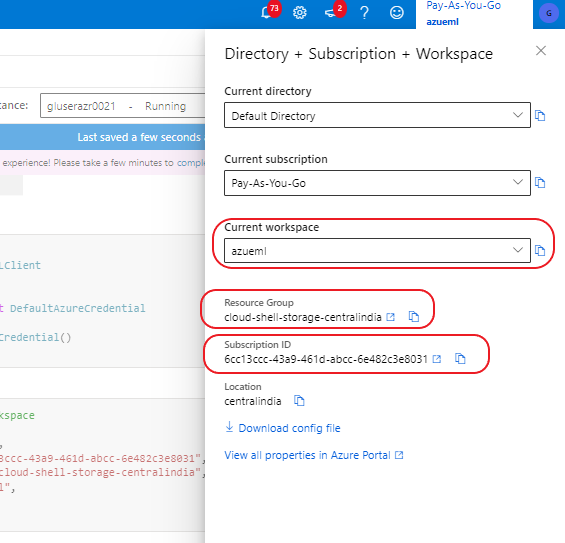

In [2]:
from IPython import display
display.Image("Image/Image3.png")

In [4]:
# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="6793e723-756c-4c5d-84c0-812f1bb4c679",
    resource_group_name="JuvlinResourceGroup",
    workspace_name="JuvlinWorkspace",
)

In [5]:
# Get the workspace
from azureml.core import Workspace

ws = Workspace.from_config()
print('Ready to work with', ws.name)

Ready to work with juvlinworkspace


### Create a compute cluster

**Create a compute cluster for processing job so that it runs in its own isolated environment. This ensures that the processing job does not interfere with other jobs or services running in your Azure ML workspace.**

In [6]:
from azure.ai.ml.entities import AmlCompute

# Name assigned to the compute cluster
cpu_compute_target = "cpu-cluster-preprocessing"

try:
    # let's see if the compute target already exists
    cpu_cluster = ml_client.compute.get(cpu_compute_target)
    print(
        f"You already have a cluster named {cpu_compute_target}, we'll reuse it as is."
    )

except Exception:
    print("Creating a new cpu compute target...")

    # Let's create the Azure ML compute object with the intended parameters
    cpu_cluster = AmlCompute(
        name=cpu_compute_target,
        # Azure ML Compute is the on-demand VM service
        type="amlcompute",
        # VM Family
        size="Standard_D2_v3",
        # Minimum running nodes when there is no job running
        min_instances=0,
        # Nodes in cluster
        max_instances=1,
        # How many seconds will the node running after the job termination
        idle_time_before_scale_down=180,
        # Dedicated or LowPriority. The latter is cheaper but there is a chance of job termination
        tier="Dedicated",
    )
    print(
        f"AMLCompute with name {cpu_cluster.name} will be created, with compute size {cpu_cluster.size}"
    )
    # Now, we pass the object to MLClient's create_or_update method
    cpu_cluster = ml_client.compute.begin_create_or_update(cpu_cluster)

Creating a new cpu compute target...
AMLCompute with name cpu-cluster-preprocessing will be created, with compute size Standard_D2_v3


**Note: Go to the "Compute" on the left --> "Compute clusters", to check the new cluster created for the processing job.  **

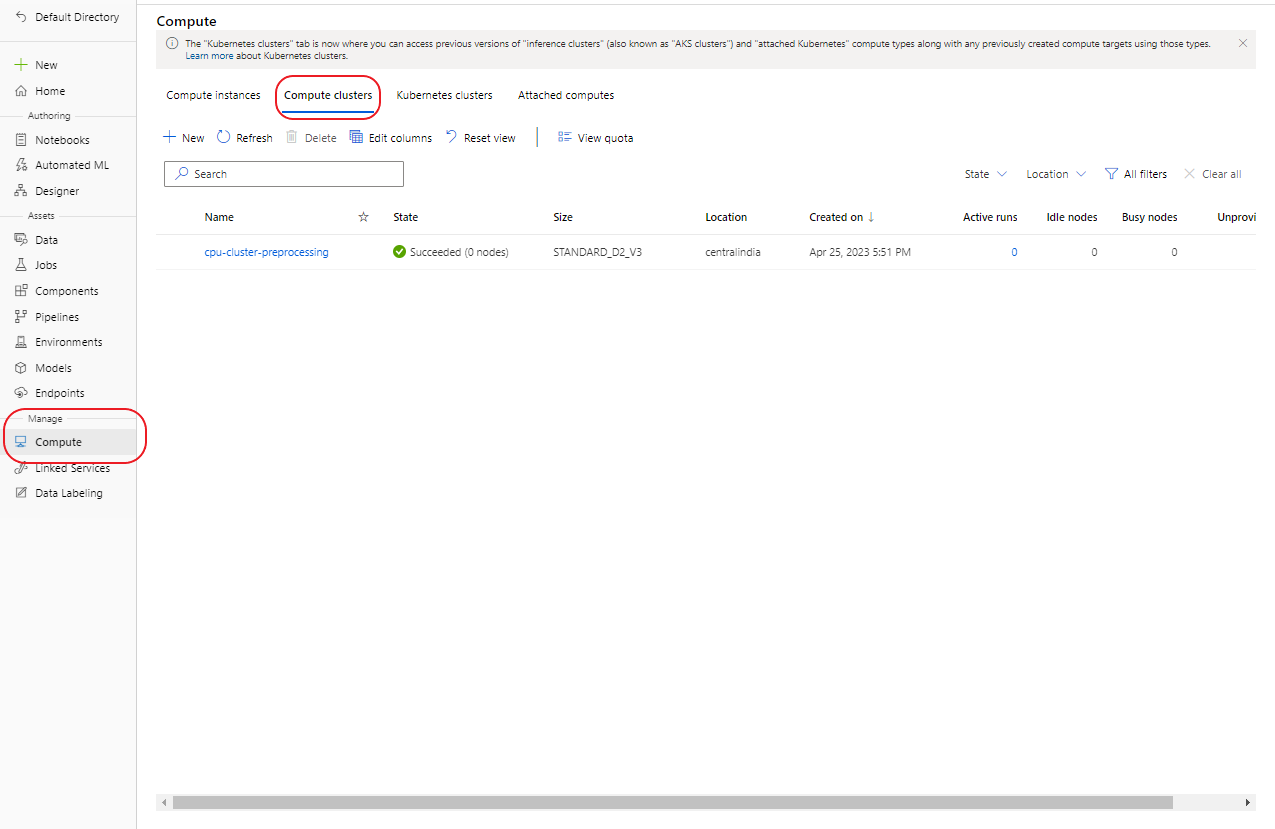

In [7]:
display.Image("Image/Image4.png")

**Writing the processing script the the "scr_test" directory**

In [9]:
%%writefile ./src_test/pre_process_test.py

Users/pinhe51261/src_test

import time
time.sleep(5)
print('done')

Writing ./src_test/pre_process_test.py


FileNotFoundError: [Errno 2] No such file or directory: './src_test/pre_process_test.py'

**Configure the command**

The command script will:
* Use the compute cluster to run the command.
* Use an environment that defines software and runtime libraries needed for the processing script.
* Configure the command line action itself - python pre_process_test.py in this case.

In [10]:
# The job is specified using the command() function

from azure.ai.ml import command
from azure.ai.ml import Input

job = command(
    code= "./src_test",
    command="python pre_process_test.py",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    compute="cpu-cluster-preprocessing",
    experiment_name="Processing_check",
    display_name="Processing demo",
)

In [11]:
# Run an Azure Machine Learning job
ml_client.create_or_update(job)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


MlException: {
  "result": "Failed",
  "errors": [
    {
      "message": "Can't find directory or file in resolved absolute path: /mnt/batch/tasks/shared/LS_root/mounts/clusters/pinhe512611/code/Users/pinhe51261/Code/azureml:./src_test.; Not a valid URL.; In order to specify a git path, please provide the correct path prefixed with 'git+\n; In order to specify an existing codes, please provide the correct registry path prefixed with 'azureml://':\n; In order to specify an existing codes, please provide the correct registry path prefixed with 'azureml://':\n; Could not parse ./src_test. If providing an ARM id, it should start with a '/'.",
      "path": "component.code",
      "value": "azureml:./src_test"
    }
  ]
}

**Note1: We can check the status of the Job by going to the "Jobs" on the left.**

**Note2: We can check the stored output data by directing towards the datastores from the left panel.**

In [ ]:
display.Image("Image/Image13.png")

**Important Note: Create a folder/directory in your Azure workspace called "Image" and upload all the shared images in the folder. By doing so you will be able to extract all the screenshots present in the code.**